# Cross Section Data

Experimentally the Rosenbluth technique is a straight forward way to extract the electric and magnetic form factors of the nucleon though limits the amount of data that can be used.

For data below 1 GeV/c^2, the world data is dominated by the Mainz data, though it is worth
noting that due to floating normalizations, different groups extract slightly different values for the form factors from the same cross section data.


## Formulas 

Now using the asymmetry result, it is possible to turn the cross section points in form factors (i.e. two equations and two unknowns).

Asymmetry = $\mu G_E / G_M$

Reduced Cross Section = $\frac{1}{\epsilon(1+\tau)}(\epsilon G_E^2 + \tau G_M^2)$
where $\tau = \frac{Q^2}{4 m_p}$.


In [1]:
from math import sqrt
import numpy as np

# So we take the rebinned data of Arrington, Hill and Lee but reformat it to four columns:
# tau, epsilon, cross section, uncertainty.

# This is 658 Cross Section Points


PROTON_MASS = 0.938272 
PROTON_MU   = 2.792847 

q2=[]; eps=[]; rcs=[]; ecs=[]

def tau(q2):
    return q2/4/PROTON_MASS**2

def charge(q2,eps,rcs,delta):
    GE2=(rcs*eps*(1+tau(q2)))/(eps+tau(q2)*(PROTON_MU/asymmetry(q2,delta))**2)
    return GE2

def magnetic(q2,eps,rcs,delta):
    GM2=(rcs*eps*(1+tau(q2)))/ (eps*(asymmetry(q2,delta)/PROTON_MU)**2+tau(q2))
    return GM2
    
def asymmetry(q2,delta):
    return (1-q2/(8.02*delta)) 

def carlfunc(q2,delta):
    return (1-q2/(8.02*delta)) 

for l in open("test.dat"):
    values=l.split()
    q2.append(float(values[0])/25.7)
    eps.append(float(values[1]))
    rcs.append(float(values[2]))   
    ecs.append(float(values[3]))  

count=0

#print('Event  Q2  GE2')

ge=[]; gm=[]; dge=[]; uge=[]; ugm=[]

for n in range(len(q2)):
    count+=1
    #print("{0:3} {1:0.3f} {2:0.3f} {3:0.3f} ".format \
    #      (count, q2[n], charge(q2[n],eps[n],rcs[n]), charge(q2[n],eps[n],rcs[n]*1.01) ))
    try:
        ge.append(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        t=(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        uge.append((sqrt(charge(q2[n],eps[n],rcs[n]*(1+ecs[n]),1.1))-t))
        gm.append(sqrt(magnetic(q2[n],eps[n],rcs[n],1)))
        y=sqrt(magnetic(q2[n],eps[n],rcs[n],1))
        x=sqrt(magnetic(q2[n],eps[n],rcs[n]*(1+ecs[n]),0.9))
        ugm.append(x-y)
    except:
        print('Problem with event',n+1)
        ge.append(0)
        uge.append(0)
        dge.append(0)
        
emax=[0,0]; emin=[10,0]
mmax=[0,0]; mmin=[10,0]

for n in range(len(ge)):
    if (uge[n]/ge[n] > emax[0]):
        emax=[uge[n]/ge[n],q2[n]]
    if (uge[n]/ge[n] < emin[0]):
        emin=[uge[n]/ge[n],q2[n]]
    if (ugm[n]/gm[n] > mmax[0]):
        mmax=[ugm[n]/gm[n],q2[n]]
    if (ugm[n]/gm[n] < mmin[0]):
        mmin=[ugm[n]/gm[n],q2[n]]
print('')
print('Check the max. and min. calculated weights.')
print('')
print('max ge weight = {0:0.4f} at Q2 = {1:0.4f}'.format(emax[0],emax[1]))
print('min ge weight = {0:0.4f} at Q2 = {1:0.4f}'.format(emin[0],emin[1]))
print('')
print('max gm weight = {0:0.4f} at Q2 = {1:0.4f}'.format(mmax[0],mmax[1]))
print('min gm weight = {0:0.4f} at Q2 = {1:0.4f}'.format(mmin[0],mmin[1]))
print('')

#for n in range(len(q2)):
#    print('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}'.format(q2[n],eps[n],rcs[n],ecs[n]))


Check the max. and min. calculated weights.

max ge weight = 0.0151 at Q2 = 0.9772
min ge weight = 0.0013 at Q2 = 0.1110

max gm weight = 0.0044 at Q2 = 0.0756
min gm weight = 0.0017 at Q2 = 0.0066



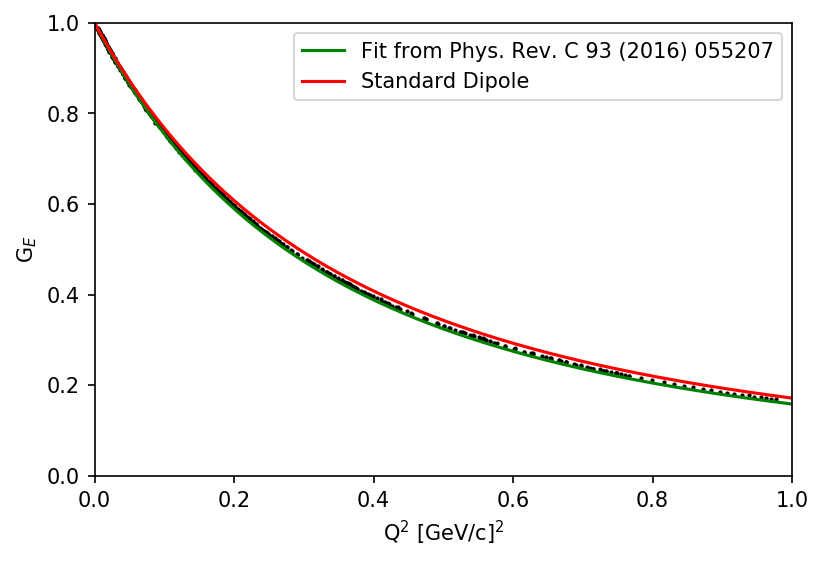

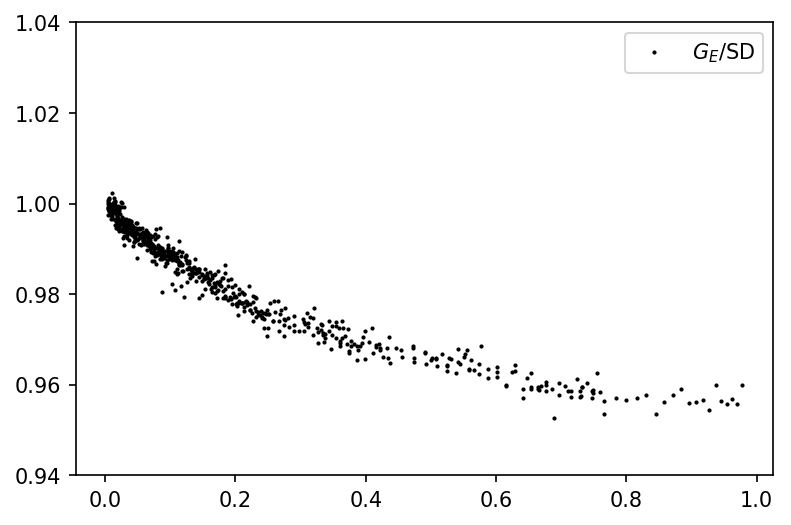

In [2]:
import matplotlib.pyplot as plt

def sd(q2):
    return (1+25.7*0.11/2*q2)**(-2)

def dd(q2):
    return (1+25.7*0.1176/2*q2)**(-2)
    #return (1-0.6*q2)/(1+2.4*q2)

rdd=[]; sdd=[]; mdd=[]

mq2=np.linspace(0,1,1000)
for n in mq2:
    rdd.append(dd(n))
    sdd.append(sd(n))
    mdd.append(sd(n)*PROTON_MU)

plt.figure(dpi=150)
plt.plot(q2,ge,'o',ms=1,color='black')
plt.errorbar(q2,ge,yerr=uge,fmt=',',zorder=1,color='black')
plt.plot(mq2,rdd,'r',color='green',label='Fit from Phys. Rev. C 93 (2016) 055207')
plt.plot(mq2,sdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_E$')
plt.legend()
plt.savefig("./Figures/GeFigure.png") # Raster Graphic
plt.savefig("./Figures/GeFigure.pdf") # Vector Graphic
plt.show()

ratio=[]
count=0
for m in q2:
    ratio.append(ge[count]/sd(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,ratio,'o',ms=1,label='$G_E$/SD',color='black')
plt.ylim(0.94,1.04)
plt.legend()
plt.show()

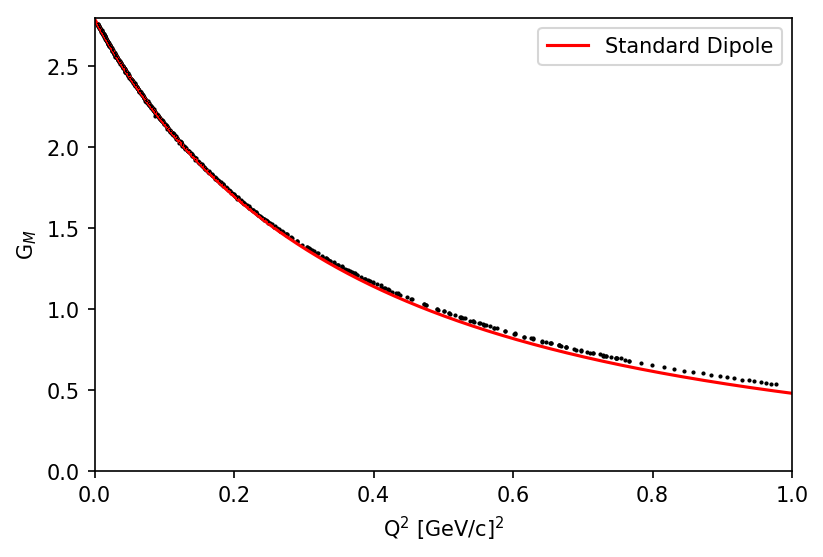

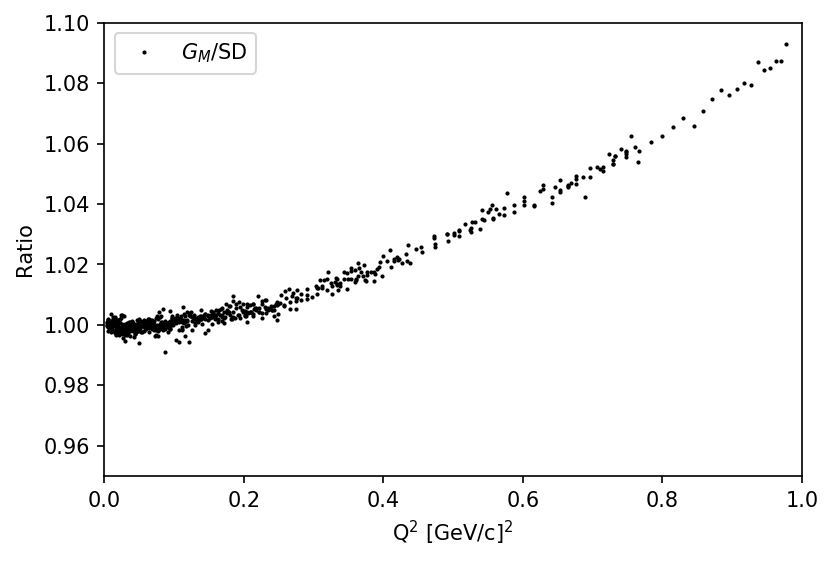

In [3]:
#
# Gm vs. Q2 Plot
#
plt.figure(dpi=150)
plt.plot(q2,gm,'o',ms=1,color='black')
plt.errorbar(q2,gm,yerr=ugm,fmt=',',color='black')
plt.plot(mq2,mdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,PROTON_MU)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_M$')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,2.8)
plt.savefig("./Figures/GmFigure.png") # Raster Graphic
plt.savefig("./Figures/GmFigure.pdf") # Vector Graphic
plt.show()

ratio=[];rq2=[]
count=0

for m in q2:
    ratio.append(gm[count]/(sd(m)*PROTON_MU))
    rq2.append(m)
    count+=1
    
plt.figure(dpi=150)
plt.plot(rq2,ratio,'o',ms=1,label='$G_M$/SD',color='black')
plt.ylim(0.95,1.1)
plt.xlim(0,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Ratio')
plt.legend()
plt.show()

[[Model]]
    Model(gefunc)
[[Fit Statistics]]
    # function evals   = 22
    # data points      = 658
    # variables        = 2
    chi-square         = 510.335
    reduced chi-square = 0.778
    Akaike info crit   = -163.222
    Bayesian info crit = -154.244
[[Variables]]
    a:   1.76323828 +/- 0.016544 (0.94%) (init= 1.5)
    b:   1.20787424 +/- 0.015090 (1.25%) (init= 1.5)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.999 



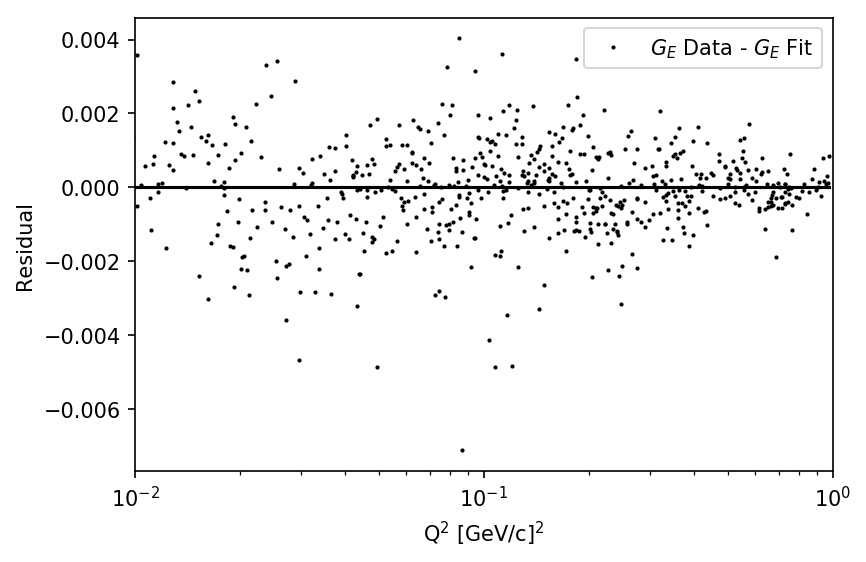

In [4]:

from lmfit import Model

def gefunc(q2,a,b):
    return ((1+a*q2)*(1+b*q2))**(-1)

weight=[]

for n in range(len(uge)):
    weight.append(1/uge[n])

model=Model(gefunc)
result=model.fit(ge,q2=q2,a=1.5,b=1.5,weights=weight)

print(result.fit_report())
a=(result.values['a'])
b=(result.values['b'])

def resultfunc(q2):
    return ((1+a*q2)*(1+b*q2))**(-1)

residual=[]
count=0
for m in q2:
    residual.append(ge[count]-resultfunc(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,residual,'o',ms=1,label='$G_E$ Data - $G_E$ Fit',color='black')
plt.plot(q2,[0]*len(q2),'-',color='black')
#plt.ylim(-0.005,0.005)
plt.xscale('log')
plt.xlim(0.01,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Residual')
plt.legend()
plt.savefig("./Figures/GeResidual.png") # Raster Graphic
plt.savefig("./Figures/GeResidual.pdf") # Vector Graphic
plt.show()

[[Model]]
    Model(gmfunc)
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 658
    # variables        = 3
    chi-square         = 388.086
    reduced chi-square = 0.592
    Akaike info crit   = -341.410
    Bayesian info crit = -327.943
[[Variables]]
    aa:   1.74781116 +/- 0.035280 (2.02%) (init= 2.5)
    bb:   1.22571786 +/- 0.036985 (3.02%) (init= 0.5)
    cc:  -0.12692971 +/- 0.003716 (2.93%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(aa, bb)                    = -0.999 
    C(bb, cc)                    = -0.976 
    C(aa, cc)                    =  0.964 



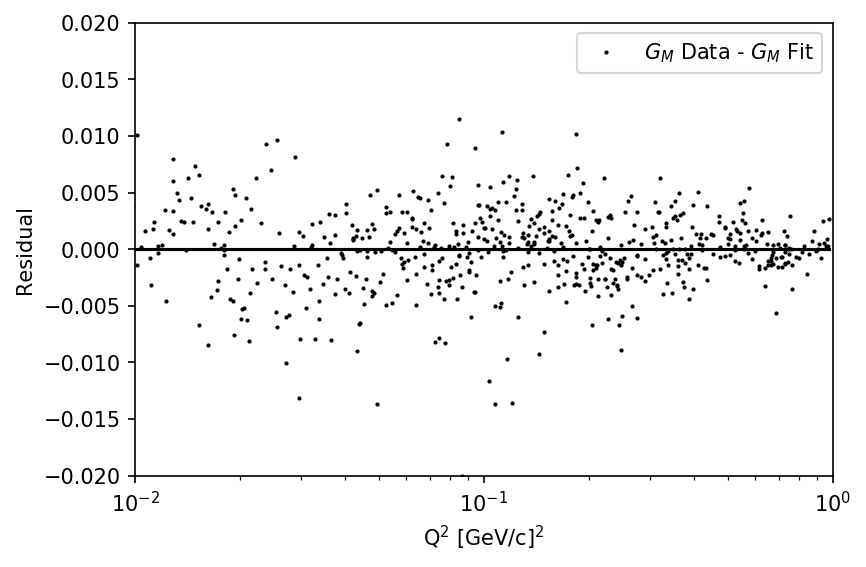

In [5]:
from lmfit import Model

def gmfunc(q2,aa,bb,cc):
    return PROTON_MU/((1+(aa)*q2)*(1+(bb)*q2)*(1+(cc)*q2))
    #return PROTON_MU/((1+aa*q2)*(1+bb*q2))

weight=[]

for n in range(len(ugm)):
    weight.append(1/ugm[n])

model=Model(gmfunc)
result=model.fit(gm,q2=q2,aa=2.5,bb=0.5,cc=0.0,weights=weight)

print(result.fit_report())
aa=(result.values['aa'])
bb=(result.values['bb'])
cc=(result.values['cc'])

def resultfunc(q2):
    return PROTON_MU/((1+(aa)*q2)*(1+(bb)*q2)*(1+(cc)*q2))
    #return PROTON_MU/((1+aa*q2)*(1+bb*q2))

residual=[]
count=0
for m in q2:
    residual.append(gm[count]-resultfunc(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,residual,'o',ms=1,label='$G_M$ Data - $G_M$ Fit',color='black')
plt.plot(q2,[0]*len(q2),'-',color='black')
plt.ylim(-0.02,0.02)
plt.xlim(0.01,1)
plt.xscale('log')
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Residual')
plt.legend()
plt.savefig("./Figures/GmResidual.png") # Raster Graphic
plt.savefig("./Figures/GmResidual.pdf") # Vector Graphic
plt.show()

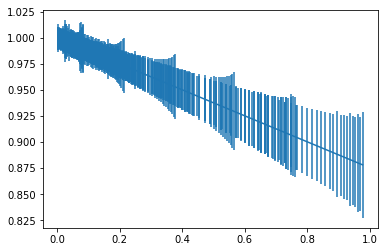

In [6]:
#f=open("result.dat","w")
#f.write('q2,     ge,     ge-err, gm,     gm-err, mu ge/gm, error')
#for n in range(len(q2)):
#    f.write('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}, {4:0.4f}, {5:0.4f}, {6:0.4f}'.\
#          format(q2[n],ge[n],uge[n],gm[n],ugm[n],PROTON_MU*ge[n]/gm[n],\
#                 PROTON_MU*(uge[n]/ge[n]+ugm[n]/gm[n])))
#f.close()

q2=np.array(q2)
ge=np.array(ge)
gm=np.array(gm)
uge=np.array(uge)
ugm=np.array(ugm)

plt.errorbar(q2,PROTON_MU*ge/gm,PROTON_MU*(uge/ge+ugm/gm))
plt.show()

In [7]:
f=open("formfactors.csv","w")
f.write('q2,     ge,     ge-err, gm,     gm-err \n')
for n in range(len(q2)):
    f.write('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}, {4:0.4f} \n'.\
          format(q2[n],ge[n],uge[n],gm[n],ugm[n]))
f.close()

With the G<sub>E</sub> and G<sub>M</sub> fits, we can make a new ratio function and complare
with the originial.

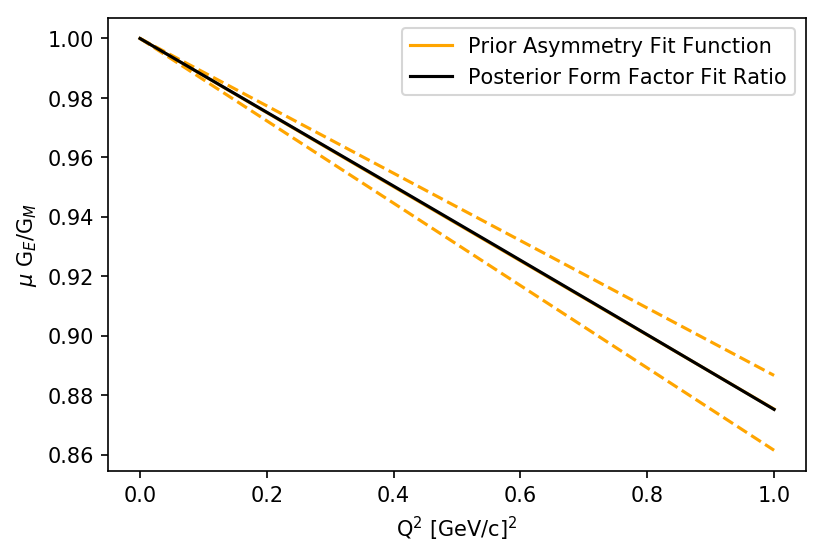

In [8]:
def newasym(q2):
#    return ((1+aa*q2)*(1+bb*q2))/((1+a*q2)*(1+b*q2))
    return ((1+aa*q2)*(1+bb*q2)*(1+cc*q2))/((1+a*q2)*(1+b*q2))

newa=[]; olda=[]; oldu=[]; oldd=[]

myq2=np.linspace(0,1,1000)

for n in range(len(myq2)):
    newa.append(newasym(myq2[n]))
    olda.append(carlfunc(myq2[n],1))
    oldu.append(carlfunc(myq2[n],1.1))
    oldd.append(carlfunc(myq2[n],0.9))

plt.figure(dpi=150)
plt.plot(myq2,olda, color='orange', label='Prior Asymmetry Fit Function')
plt.plot(myq2,oldu, '--', color='orange')# label='Prior Asymmetry Fit Function')
plt.plot(myq2,oldd, '--', color='orange')# label='Prior Asymmetry')
plt.plot(myq2,newa, color='black', label='Posterior Form Factor Fit Ratio')
plt.legend()
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('$\mu$ G$_E$/G$_M$')
plt.show()

In [9]:
print('Resulting Form Factor Ratio Fuction')
print('')
print('def newasym(q2):')
print('     return (( 1 +{0:0.4f}*q2)*(1+{1:0.4f}*q2)*(1+{2:0.4f}))/((1+{3:0.4f}*q2)*(1+{4:0.4f}*q2))'.\
      format(aa,bb,cc,a,b))

Resulting Form Factor Ratio Fuction

def newasym(q2):
     return (( 1 +1.7478*q2)*(1+1.2257*q2)*(1+-0.1269))/((1+1.7632*q2)*(1+1.2079*q2))


## References

* https://doi.org/10.1103/PhysRevD.92.013013
* https://doi.org/10.1103/PhysRevC.93.055201
* D. Higinbotham <it>et al.</it>,PRC 93 (2016) 055207.  https://doi.org/10.1103/PhysRevC.93.055207

## Comparision of Normalization Factors

As the Mainz data were presented with floating normalizations, to provide a reproducbile
result requires one to provided the 31 normalization parameters that were used to generate
the results.   Herein the following parameters are nominally used:
    
norms =  [9.98510048e-01,   9.94389162e-01,   1.00133071e+00,
         1.00388252e+00,   1.00180802e+00,   1.00113333e+00,
         1.00054694e+00,   1.00429562e+00,   1.00442098e+00,
         9.98589695e-01,   9.99452006e-01,   1.00145786e+00,
         1.00982071e+00,   1.00979008e+00,   1.00851470e+00,
         9.99556012e-01,   9.97575155e-01,   1.00920515e+00,
         1.00947783e+00,   1.00842080e+00,   9.99770246e-01,
         9.99555643e-01,   1.00167938e+00,   1.00007699e+00,
         1.00950634e+00,   1.01011761e+00,   9.96535641e-01,
         1.00405263e+00,   1.01681976e+00,   9.93798707e-01,
         1.01475792e+00]
         
But it is amuzing to note the entire electron scattering proton radius discussion is really about a normalization differences of 0.002 of the lowest Q2 data.   Here is an example of a set of norms that give a larger radius.  

norms =  [1.00110998e+00,   1.00093139e+00,   9.94789187e-01,
         9.93929813e-01,   9.94016737e-01,   9.99883738e-01,
         9.99951805e-01,   1.00017351e+00,   9.97551841e-01,
         1.00055297e+00,   1.00000349e+00,   9.99983635e-01,
         9.98626364e-01,   9.97891549e-01,   9.98424457e-01,
         1.00018887e+00,   1.00004548e+00,   9.99725428e-01,
         9.99815932e-01,   9.99517553e-01,   9.99813455e-01,
         9.99301154e-01,   1.00009292e+00,   9.99205455e-01,
         1.00071200e+00,   1.00117761e+00,   1.00064123e+00,
         9.99790657e-01,   1.00108177e+00,   1.00042756e+00,
         1.00132714e+00]
         
A comparision of the $G_E$ data that is exacted from these two sets of normalizations results in a systematic shift in the entire $G_E$ spectrum of 0.002.

658


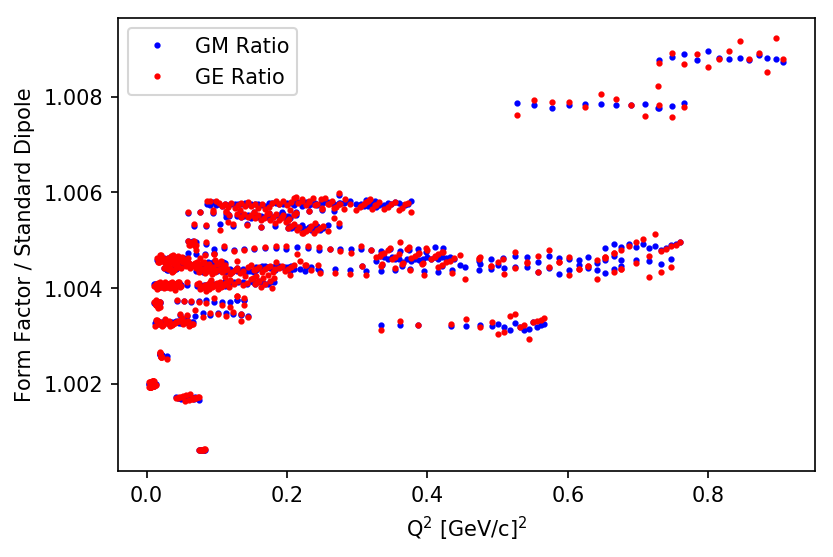

In [10]:
q2=[];ge1=[];gm1=[];ge2=[];gm2=[]

for l in open("formfactors-norm1.dat"):
    values=l.split(',')
    try:
        q2.append(float(values[0]))
        ge1.append(float(values[1]))
        gm1.append(float(values[3]))
    except:
        continue
    
for l in open("formfactors-norm2.dat"):
    values=l.split(',')
    try:
        ge2.append(float(values[1]))
        gm2.append(float(values[3]))
    except:
        continue

print(len(q2))
q2=np.array(q2[0:650])
ge1=np.array(ge1[0:650])
ge2=np.array(ge2[0:650])
gm1=np.array(gm1[0:650])
gm2=np.array(gm2[0:650])

plt.figure(dpi=150)
plt.plot(q2,gm1/gm2,'o',color='blue',label='GM Ratio',ms=2)
plt.plot(q2,ge1/ge2,'o',color='red',label='GE Ratio',ms=2)
#plt.xlim(0,0.1)
#plt.ylim(0.99,1.01)
plt.legend()
plt.ylabel('Form Factor / Standard Dipole')
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.show()
    
    

### Using a fit with higher order term fixed.

In [11]:
def linefunc(q2,aaa,bbb):
    return bbb*(1+aaa*q2+7.2*q2**2)

model=Model(linefunc)
result1=model.fit(ge1,q2=q2,aaa=0.1,bbb=1,weights=1/0.002)
print(result1.fit_report())

a1=(result1.values['aaa'])
a2=(result2.values['aaa'])

model=Model(linefunc)
result2=model.fit(ge2,q2=q2,aaa=0.1,bbb=1,weights=1/0.002)
print(result2.fit_report())

[[Model]]
    Model(linefunc)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 650
    # variables        = 2
    chi-square         = 18902565.199
    reduced chi-square = 29170.625
    Akaike info crit   = 6684.593
    Bayesian info crit = 6693.547
[[Variables]]
    aaa:  -5.36141318 +/- 0.053516 (1.00%) (init= 0.1)
    bbb:   0.98861981 +/- 0.024290 (2.46%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(aaa, bbb)                  = -0.491 



NameError: name 'result2' is not defined

In [ ]:
print(sqrt(abs(a1)/25.7*6),'fm radius for norm 1')

In [ ]:
print(sqrt(abs(a2/0.998)/25.7*6),'fm radius for norm 2')

In [ ]:
import pickle 

with open('interpolator.pkl', 'rb') as f:
    Jose = pickle.load(f)

In [ ]:
plt.plot(q2,ge1/0.9994-Jose(q2),'o',zorder=11)
plt.plot(q2,ge2/0.9984-Jose(q2),'o')
plt.show()